# Classification: Multi-layer Perceptron Classifier

In [27]:
#IMPORT DATA
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [28]:
data.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


target
0    500
1    268
dtype: int64


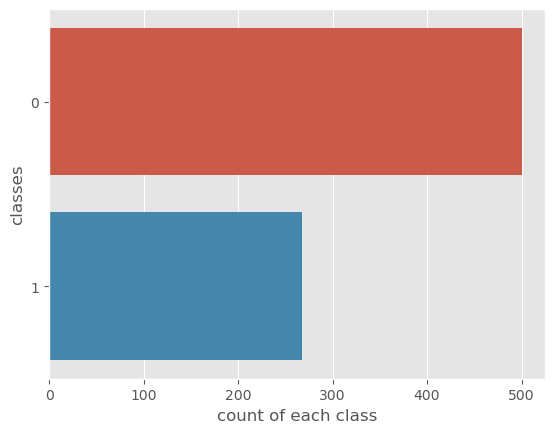

In [29]:
#Print class freq. through pandas 
print(data.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data.target ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [30]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
#basic statistic details about the data
data.describe(include="all")

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
#Separate X and y (explanatory variables and target variable)
X = data.iloc[:,0:-1]
column_names = list(X) 
y = data.iloc[:,-1] 

#X.head()
#y.head()

In [33]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(537, 8)


## Multi-layer Perceptron classifier
![MLPC](mlp.png)


In [34]:
'''Multi-layer Perceptron classifier'''
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(5,3,2),
              activation='relu', 
                    alpha=0.01, batch_size='auto',              
              learning_rate='adaptive',
              max_iter=200, solver='sgd', tol=0.00001,
              verbose=True)

# hidden_layer_sizes :  The ith element represents the number of neurons in the ith hidden layer, default (100,) . 
# activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
    #Activation function for the hidden layer.
    #        ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
    #        ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    #        ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    #        ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    #      ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
    #        ‘sgd’ refers to stochastic gradient descent.
    #        ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
# alpha : float, optional, default 0.0001
    #L2 penalty (regularization term) parameter.
# batch_size :Size of minibatches for stochastic optimizers. When set to “auto”, batch_size=min(200, n_samples)
# learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’
    #    ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
    #    ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
    #    ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
# learning_rate_init : double, optional, default 0.001
# max_iter : Maximum number of iterations.
# tol :Tolerance for the optimization.
# verbose : 

# NOTE: Natively supports multi-class. Which of the other classification algorithms seen so far does too?

model.fit(X_train, y_train)
model.predict(X_test)


Iteration 1, loss = 0.67183762
Iteration 2, loss = 0.67174385
Iteration 3, loss = 0.67157787
Iteration 4, loss = 0.67138871
Iteration 5, loss = 0.67116886
Iteration 6, loss = 0.67092119
Iteration 7, loss = 0.67067422
Iteration 8, loss = 0.67039942
Iteration 9, loss = 0.67014595
Iteration 10, loss = 0.66987604
Iteration 11, loss = 0.66958832
Iteration 12, loss = 0.66932450
Iteration 13, loss = 0.66906247
Iteration 14, loss = 0.66877539
Iteration 15, loss = 0.66852519
Iteration 16, loss = 0.66822199
Iteration 17, loss = 0.66798521
Iteration 18, loss = 0.66771966
Iteration 19, loss = 0.66746129
Iteration 20, loss = 0.66719988
Iteration 21, loss = 0.66693771
Iteration 22, loss = 0.66670439
Iteration 23, loss = 0.66645820
Iteration 24, loss = 0.66619090
Iteration 25, loss = 0.66595587
Iteration 26, loss = 0.66570442
Iteration 27, loss = 0.66545391
Iteration 28, loss = 0.66521628
Iteration 29, loss = 0.66500992
Iteration 30, loss = 0.66478508
Iteration 31, loss = 0.66451476
Iteration 32, los

/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [37]:
'''Multi-layer Perceptron classifier'''
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(random_state=123)
parameters = {"hidden_layer_sizes":[(20,5),(6,2), (25)],  "max_iter": [1000, 5000, 100000], "alpha": [0.001, 0.01]}
#hidden_layer_sizes : The ith element represents the number of neurons in the ith hidden layer.

In [38]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [39]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [40]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.618725 using {'alpha': 0.001, 'hidden_layer_sizes': (6, 2), 'max_iter': 1000}
0.553279 (0.037853) with: {'alpha': 0.001, 'hidden_layer_sizes': (20, 5), 'max_iter': 1000}
0.557036 (0.029530) with: {'alpha': 0.001, 'hidden_layer_sizes': (20, 5), 'max_iter': 5000}
0.557036 (0.029530) with: {'alpha': 0.001, 'hidden_layer_sizes': (20, 5), 'max_iter': 100000}
0.618725 (0.051181) with: {'alpha': 0.001, 'hidden_layer_sizes': (6, 2), 'max_iter': 1000}
0.618725 (0.051181) with: {'alpha': 0.001, 'hidden_layer_sizes': (6, 2), 'max_iter': 5000}
0.618725 (0.051181) with: {'alpha': 0.001, 'hidden_layer_sizes': (6, 2), 'max_iter': 100000}
0.583067 (0.017095) with: {'alpha': 0.001, 'hidden_layer_sizes': 25, 'max_iter': 1000}
0.568389 (0.031806) with: {'alpha': 0.001, 'hidden_layer_sizes': 25, 'max_iter': 5000}
0.568389 (0.031806) with: {'alpha': 0.001, 'hidden_layer_sizes': 25, 'max_iter': 100000}
0.554762 (0.026005) with: {'alpha': 0.01, 'hidden_layer_sizes': (20

In [41]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_scaled)

y_pred_train = best_model.predict(X_train_scaled)

In [42]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [43]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6858789625360231
--
***RESULTS ON TEST SET***
f1_score:  0.6490066225165563


In [44]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       150
           1       0.70      0.60      0.65        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [45]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[129  21]
 [ 32  49]]


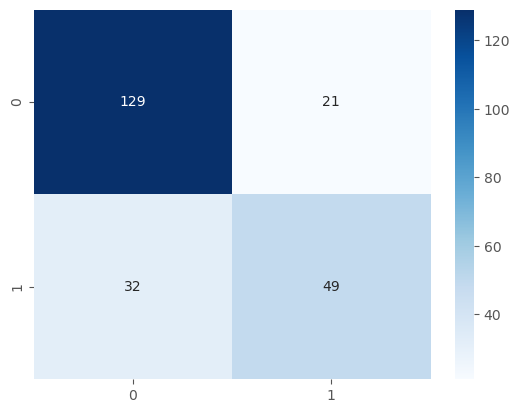

In [46]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


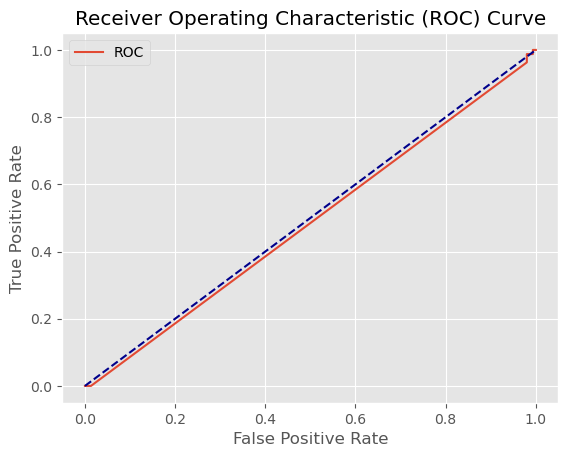

AUC: 0.49
[CV 2/3; 1/18] START alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=1000.....
[CV 2/3; 1/18] END alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=1000; total time=   1.7s
[CV 3/3; 3/18] START alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=100000...
[CV 3/3; 3/18] END alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=100000; total time=   2.2s
[CV 2/3; 8/18] START alpha=0.001, hidden_layer_sizes=25, max_iter=5000..........
[CV 2/3; 8/18] END alpha=0.001, hidden_layer_sizes=25, max_iter=5000; total time=   1.8s
[CV 1/3; 11/18] START alpha=0.01, hidden_layer_sizes=(20, 5), max_iter=5000.....
[CV 1/3; 11/18] END alpha=0.01, hidden_layer_sizes=(20, 5), max_iter=5000; total time=   2.3s
[CV 1/3; 14/18] START alpha=0.01, hidden_layer_sizes=(6, 2), max_iter=5000......
[CV 1/3; 14/18] END alpha=0.01, hidden_layer_sizes=(6, 2), max_iter=5000; total time=   1.2s
[CV 2/3; 16/18] START alpha=0.01, hidden_layer_sizes=25, max_iter=1000..........
[CV 2/3; 16/18] END alpha=0.01, hidden

/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations

[CV 3/3; 2/18] START alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=5000.....
[CV 3/3; 2/18] END alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=5000; total time=   2.2s
[CV 3/3; 4/18] START alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=1000......
[CV 3/3; 4/18] END alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=1000; total time=   1.1s
[CV 3/3; 6/18] START alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=100000....
[CV 3/3; 6/18] END alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=100000; total time=   1.0s
[CV 2/3; 9/18] START alpha=0.001, hidden_layer_sizes=25, max_iter=100000........
[CV 2/3; 9/18] END alpha=0.001, hidden_layer_sizes=25, max_iter=100000; total time=   1.8s
[CV 3/3; 11/18] START alpha=0.01, hidden_layer_sizes=(20, 5), max_iter=5000.....
[CV 3/3; 11/18] END alpha=0.01, hidden_layer_sizes=(20, 5), max_iter=5000; total time=   2.7s
[CV 2/3; 15/18] START alpha=0.01, hidden_layer_sizes=(6, 2), max_iter=100000....
[CV 2/3; 15/18] END alpha=0.01, hidden_layer_si

/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3; 1/18] START alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=1000.....
[CV 3/3; 1/18] END alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=1000; total time=   1.7s
[CV 1/3; 4/18] START alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=1000......
[CV 1/3; 4/18] END alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=1000; total time=   1.3s
[CV 1/3; 6/18] START alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=100000....
[CV 1/3; 6/18] END alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=100000; total time=   1.3s
[CV 1/3; 9/18] START alpha=0.001, hidden_layer_sizes=25, max_iter=100000........
[CV 1/3; 9/18] END alpha=0.001, hidden_layer_sizes=25, max_iter=100000; total time=   1.7s
[CV 2/3; 11/18] START alpha=0.01, hidden_layer_sizes=(20, 5), max_iter=5000.....
[CV 2/3; 11/18] END alpha=0.01, hidden_layer_sizes=(20, 5), max_iter=5000; total time=   3.5s
[CV 1/3; 17/18] START alpha=0.01, hidden_layer_sizes=25, max_iter=5000..........
[CV 1/3; 17/18] END alpha=0.01, hidden_layer_si

/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations

[CV 1/3; 2/18] START alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=5000.....
[CV 1/3; 2/18] END alpha=0.001, hidden_layer_sizes=(20, 5), max_iter=5000; total time=   2.4s
[CV 1/3; 5/18] START alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=5000......
[CV 1/3; 5/18] END alpha=0.001, hidden_layer_sizes=(6, 2), max_iter=5000; total time=   1.4s
[CV 1/3; 8/18] START alpha=0.001, hidden_layer_sizes=25, max_iter=5000..........
[CV 1/3; 8/18] END alpha=0.001, hidden_layer_sizes=25, max_iter=5000; total time=   1.7s
[CV 3/3; 10/18] START alpha=0.01, hidden_layer_sizes=(20, 5), max_iter=1000.....
[CV 3/3; 10/18] END alpha=0.01, hidden_layer_sizes=(20, 5), max_iter=1000; total time=   1.7s
[CV 2/3; 13/18] START alpha=0.01, hidden_layer_sizes=(6, 2), max_iter=1000......
[CV 2/3; 13/18] END alpha=0.01, hidden_layer_sizes=(6, 2), max_iter=1000; total time=   0.8s
[CV 3/3; 13/18] START alpha=0.01, hidden_layer_sizes=(6, 2), max_iter=1000......
[CV 3/3; 13/18] END alpha=0.01, hidden_layer_sizes=

/home/mausoto/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
/home/mausoto/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [49]:
from sklearn import metrics
#Best score: 0.618725 using {'alpha': 0.001, 'hidden_layer_sizes': (6, 2), 'max_iter': 1000}
model=MLPClassifier(hidden_layer_sizes=(6,2), alpha=0.001, max_iter=1000, random_state=123)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)